# Explore here

In [22]:
# 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ast

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv",sep=",")
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Eliminamos los datos irrelevantes

In [14]:
X = df[["MedInc", "Latitude", "Longitude"]]
X.head(5)

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [15]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

MODELO NO SUPERVISADO

In [16]:
modelo_nosuper = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)

modelo_nosuper.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [17]:
y_train = list(modelo_nosuper.labels_)
X_train["cluster"] = y_train
X_train.head(5)

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


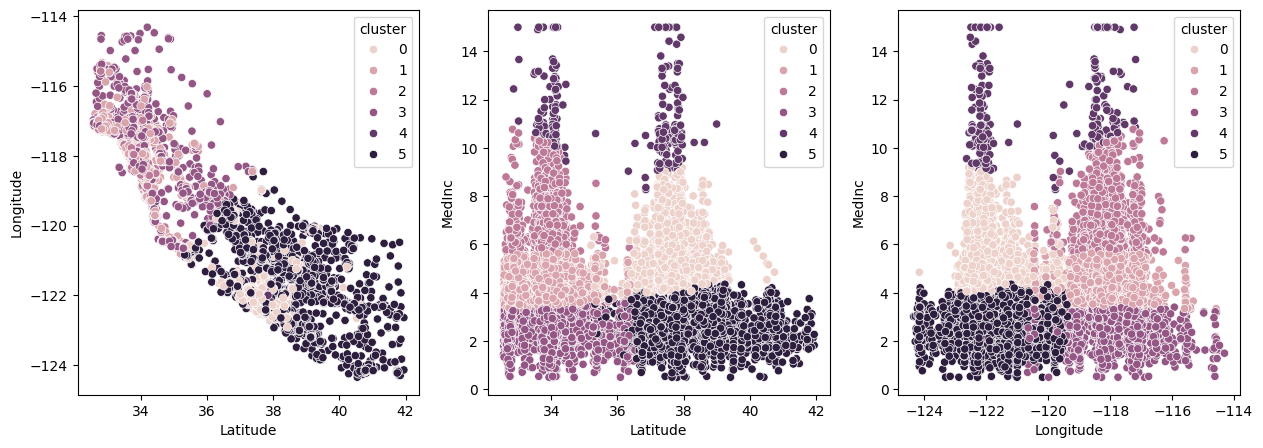

In [36]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster")
plt.show()

In [29]:
y_test = list(modelo_nosuper.predict(X_test))
X_test["cluster"] = y_test

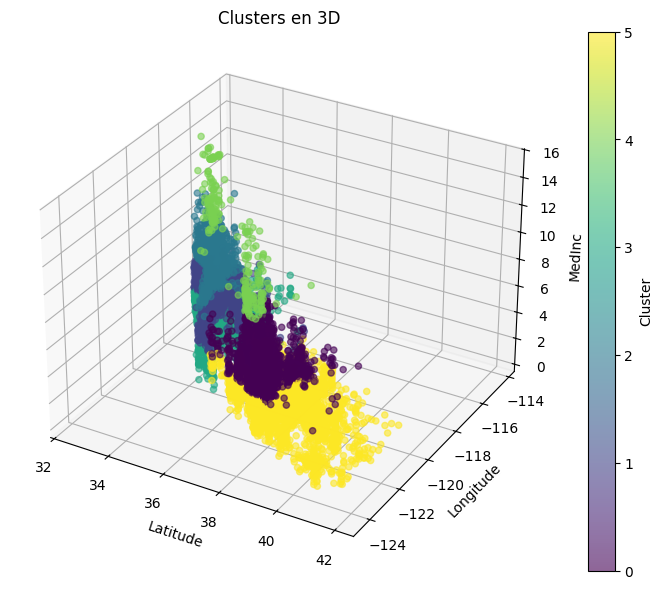

In [21]:
# Crear figura en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
scatter = ax.scatter(X_train["Latitude"], 
                     X_train["Longitude"], 
                     X_train["MedInc"], 
                     c=X_train["cluster"], 
                     cmap="viridis", 
                     alpha=0.6)

# Etiquetas de ejes
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("MedInc")
ax.set_title("Clusters en 3D")

# Barra de colores
plt.colorbar(scatter, ax=ax, label="Cluster")

plt.show()

MODELO SUPERVISADO


In [30]:

modelo_super = DecisionTreeClassifier(random_state = 42)
modelo_super.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = modelo_super.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

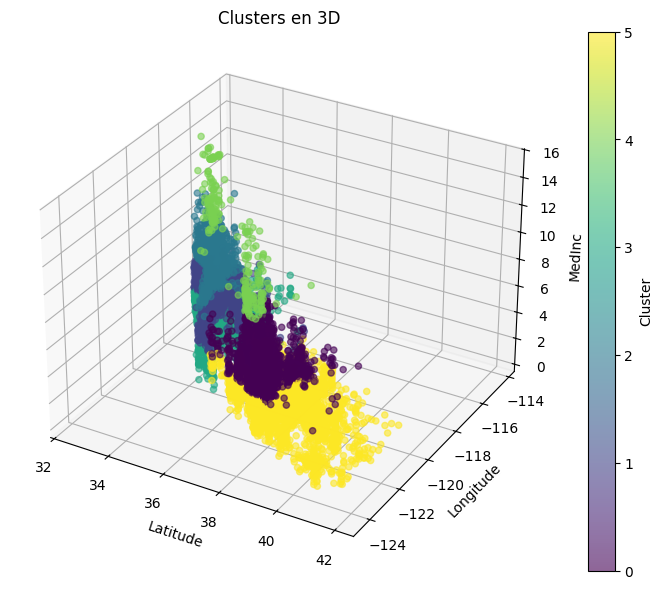

In [32]:
# Crear figura en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
scatter = ax.scatter(X_train["Latitude"], 
                     X_train["Longitude"], 
                     X_train["MedInc"], 
                     c=X_train["cluster"], 
                     cmap="viridis", 
                     alpha=0.6)

# Etiquetas de ejes
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("MedInc")
ax.set_title("Clusters en 3D")

# Barra de colores
plt.colorbar(scatter, ax=ax, label="Cluster")

plt.show()

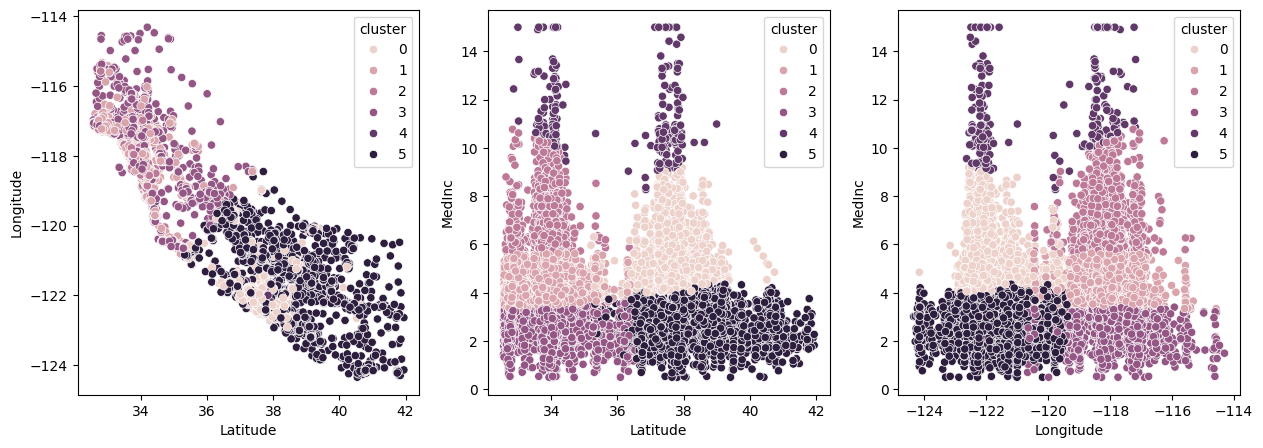

In [35]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster")
plt.show()